In [ ]:
Analyse en Composantes Principales (PCA) sur un jeu de données de notes d'élèves

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Configuration pour de meilleurs graphiques
plt.style.use('seaborn-v0_8-whitegrid')  # Version compatible avec Matplotlib récent
# Alternative: plt.style.use('seaborn-v0_8') ou simplement 'seaborn'
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)

# Chargement des données
df = pd.read_csv('notes.csv')

# Affichage des premières lignes pour vérifier le chargement
print("Aperçu des données :")
display(df.head())

# Informations sur le dataset
print("\nInformations sur le dataset :")
print(f"Nombre d'élèves : {df.shape[0]}")
print(f"Nombre de matières : {df.shape[1] - 1 if 'Eleve' in df.columns else df.shape[1]}")

# Statistiques descriptives
print("\nStatistiques descriptives :")
display(df.describe())

Aperçu des données :


,Eleve,Math,Physique,Chimie,Français,Histoire,Géographie,Anglais
0,Eleve1,16,15,17,11,10,12,14
1,Eleve2,12,13,11,15,14,15,15
2,Eleve3,9,10,8,14,15,13,12
3,Eleve4,18,19,17,17,16,18,18
4,Eleve5,14,13,15,10,9,10,13



Informations sur le dataset :
Nombre d'élèves : 30
Nombre de matières : 7

Statistiques descriptives :


,Math,Physique,Chimie,Français,Histoire,Géographie,Anglais
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,13.500000,13.600000,13.433333,13.433333,13.066667,13.633333,13.833333
std,3.037127,3.470069,2.860954,3.244978,3.372642,3.468910,2.817229
min,8.000000,7.000000,8.000000,7.000000,6.000000,7.000000,8.000000
25%,11.000000,10.250000,11.250000,11.000000,10.250000,11.250000,12.000000
50%,13.500000,13.500000,13.500000,14.000000,13.500000,13.500000,14.000000
75%,16.000000,16.000000,15.750000,16.000000,15.750000,16.000000,15.750000
max,19.000000,20.000000,19.000000,19.000000,18.000000,20.000000,19.000000


In [4]:
# Séparation des identifiants et des notes
# Si votre DataFrame contient une colonne 'Eleve', ajustez ce code
if 'Eleve' in df.columns:
    X = df.drop('Eleve', axis=1)
    eleves = df['Eleve']
else:
    X = df.copy()
    eleves = pd.Series([f"Eleve_{i+1}" for i in range(len(df))])

# Vérification des valeurs manquantes
print("Nombre de valeurs manquantes par matière :")
print(X.isnull().sum())

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Conversion en DataFrame pour une meilleure lisibilité
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nAperçu des données standardisées :")
display(X_scaled_df.head())

Nombre de valeurs manquantes par matière :
Math          0
Physique      0
Chimie        0
Français      0
Histoire      0
Géographie    0
Anglais       0
dtype: int64

Aperçu des données standardisées :


,Math,Physique,Chimie,Français,Histoire,Géographie,Anglais
0,0.837218,0.410347,1.267983,-0.762696,-0.924822,-0.478899,0.060171
1,-0.502331,-0.175863,-0.865072,0.491051,0.281467,0.400711,0.421198
2,-1.506993,-1.055179,-1.931600,0.177614,0.583040,-0.185695,-0.661882
3,1.506993,1.582768,1.267983,1.117924,0.884612,1.280320,1.504278
4,0.167444,-0.175863,0.556964,-1.076133,-1.226394,-1.065305,-0.300856


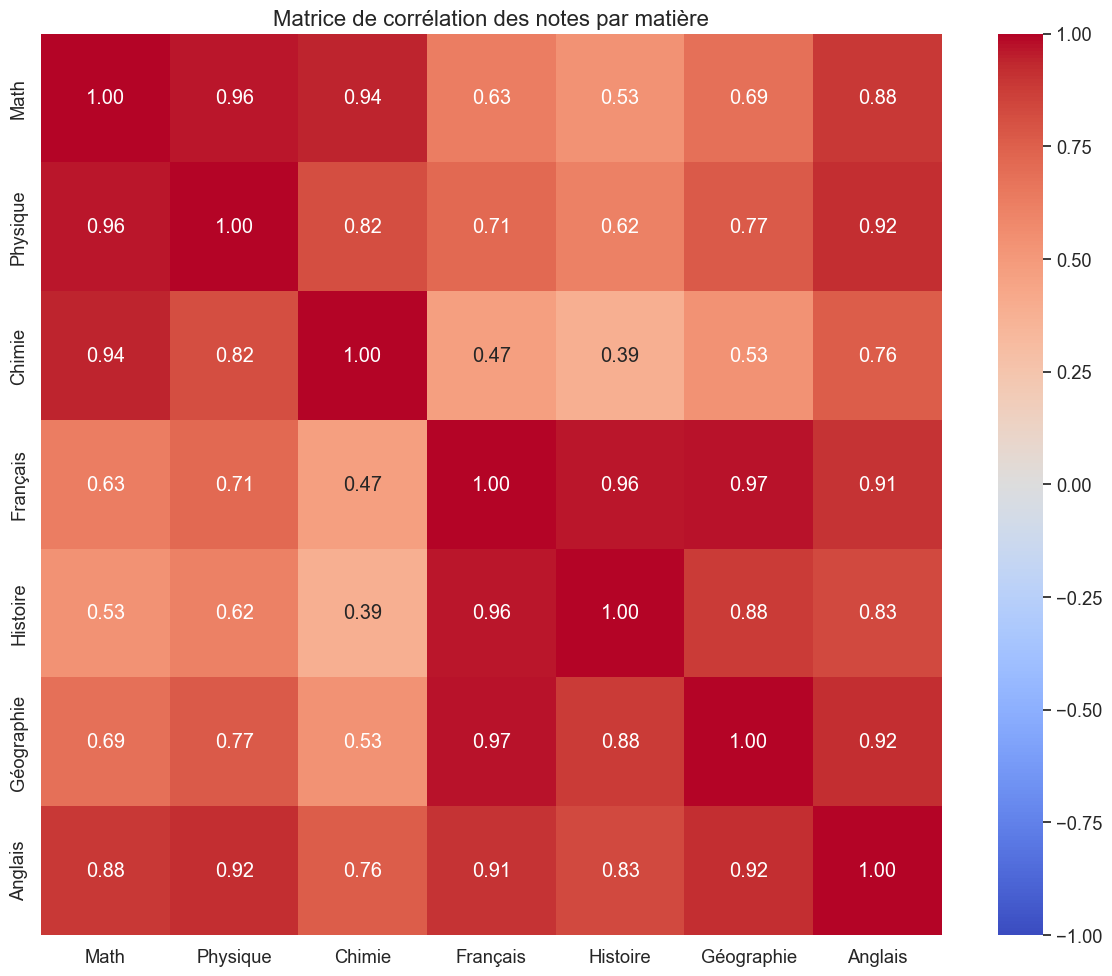

Observations sur les corrélations :
- On remarque des corrélations fortes entre les matières scientifiques (Math, Physique, Chimie)
- De même entre les matières littéraires (Français, Histoire, Géographie)
- L'Anglais semble effectivement avoir des corrélations intermédiaires avec les deux groupes


In [5]:
# Calcul de la matrice de corrélation
corr_matrix = X.corr()

# Affichage de la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Matrice de corrélation des notes par matière', fontsize=16)
plt.tight_layout()
plt.show()

# Commentaires sur les corrélations observées
print("Observations sur les corrélations :")
print("- On remarque des corrélations fortes entre les matières scientifiques (Math, Physique, Chimie)")
print("- De même entre les matières littéraires (Français, Histoire, Géographie)")
print("- L'Anglais semble effectivement avoir des corrélations intermédiaires avec les deux groupes")

In [6]:
# Application de la PCA
pca = PCA(n_components=7)
components = pca.fit_transform(X_scaled)

# Récupération de la variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Affichage de la variance expliquée
print("Variance expliquée par chaque composante :")
for i, var in enumerate(explained_variance):
    print(f"Composante {i+1}: {var:.4f} ({cumulative_variance[i]:.4f} cumulé)")

Variance expliquée par chaque composante :
Composante 1: 0.8033 (0.8033 cumulé)
Composante 2: 0.1603 (0.9636 cumulé)
Composante 3: 0.0207 (0.9843 cumulé)
Composante 4: 0.0130 (0.9973 cumulé)
Composante 5: 0.0022 (0.9996 cumulé)
Composante 6: 0.0004 (0.9999 cumulé)
Composante 7: 0.0001 (1.0000 cumulé)


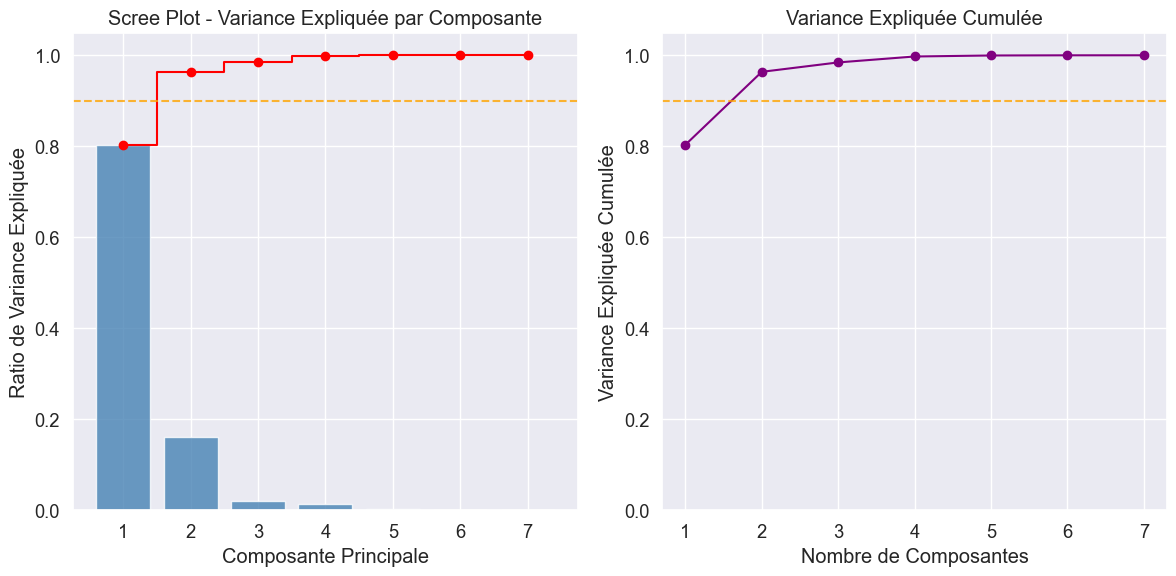

Nombre de composantes nécessaires pour expliquer 90% de la variance : 2


In [7]:
# Création du Scree Plot
plt.figure(figsize=(12, 6))

# Graphique de la variance expliquée
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.8, color='steelblue')
plt.step(range(1, len(explained_variance) + 1), cumulative_variance, where='mid', color='red', marker='o')
plt.axhline(y=0.9, color='orange', linestyle='--', alpha=0.8)
plt.xlabel('Composante Principale')
plt.ylabel('Ratio de Variance Expliquée')
plt.title('Scree Plot - Variance Expliquée par Composante')
plt.xticks(range(1, len(explained_variance) + 1))
plt.ylim(0, 1.05)
plt.grid(True)

# Graphique de la variance cumulée
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'o-', color='purple')
plt.axhline(y=0.9, color='orange', linestyle='--', alpha=0.8)
plt.xlabel('Nombre de Composantes')
plt.ylabel('Variance Expliquée Cumulée')
plt.title('Variance Expliquée Cumulée')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.ylim(0, 1.05)
plt.grid(True)

plt.tight_layout()
plt.show()

# Identification du nombre de composantes nécessaires pour atteindre 90% de variance expliquée
n_components_90 = np.where(cumulative_variance >= 0.9)[0][0] + 1
print(f"Nombre de composantes nécessaires pour expliquer 90% de la variance : {n_components_90}")

Loadings (poids des variables) :


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Math,0.378439,0.413297,-0.065783,-0.135895,-0.156774,0.092671,0.793730
Physique,0.390253,0.260390,-0.615119,-0.363268,-0.199570,0.033385,-0.478144
Chimie,0.328651,0.543118,0.621526,0.243432,-0.113275,0.024367,-0.371528
Français,0.382169,-0.395078,0.057388,0.114742,0.067042,0.822006,-0.034824
Histoire,0.351379,-0.472893,0.415039,-0.559127,-0.255434,-0.320560,0.004348
Géographie,0.388961,-0.294197,-0.232041,0.681556,-0.320149,-0.373132,0.045527
Anglais,0.419123,-0.011786,-0.040157,0.001685,0.866329,-0.268371,0.005713


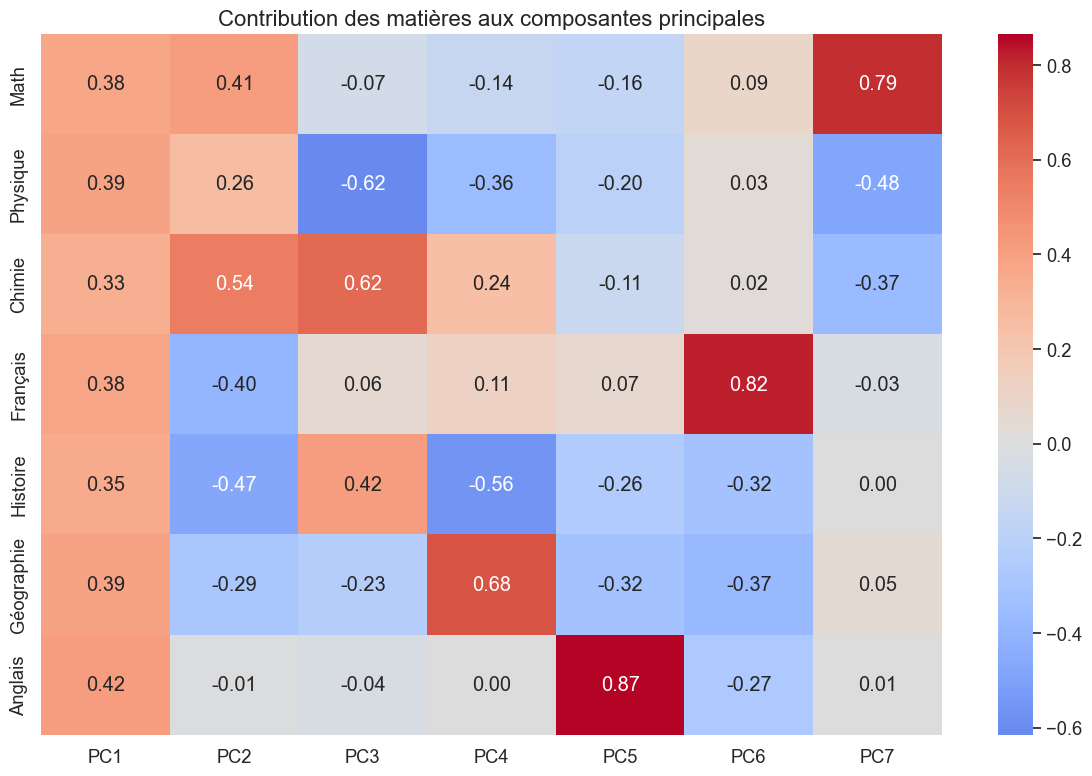

C:\Users\baofr\AppData\Local\Temp\ipykernel_15508\3813265653.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings_df.index, y=loadings_df['PC1'], palette='viridis')
C:\Users\baofr\AppData\Local\Temp\ipykernel_15508\3813265653.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings_df.index, y=loadings_df['PC2'], palette='viridis')


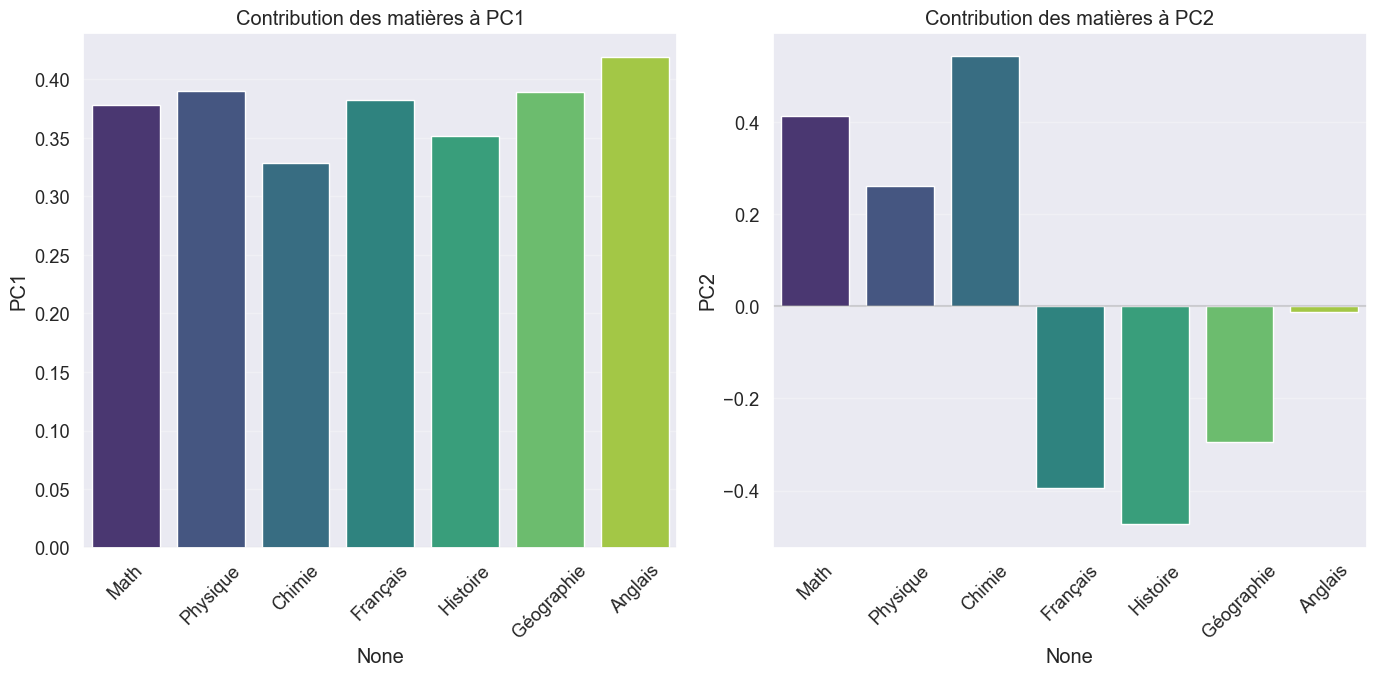

In [8]:
# Récupération des loadings (poids des variables sur chaque composante)
loadings = pca.components_

# Création d'un DataFrame pour visualiser les loadings
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=X.columns)
print("Loadings (poids des variables) :")
display(loadings_df)

# Visualisation des loadings sous forme de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Contribution des matières aux composantes principales', fontsize=16)
plt.tight_layout()
plt.show()

# Visualisation des loadings pour PC1 et PC2
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x=loadings_df.index, y=loadings_df['PC1'], palette='viridis')
plt.title('Contribution des matières à PC1')
plt.xticks(rotation=45)
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
sns.barplot(x=loadings_df.index, y=loadings_df['PC2'], palette='viridis')
plt.title('Contribution des matières à PC2')
plt.xticks(rotation=45)
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

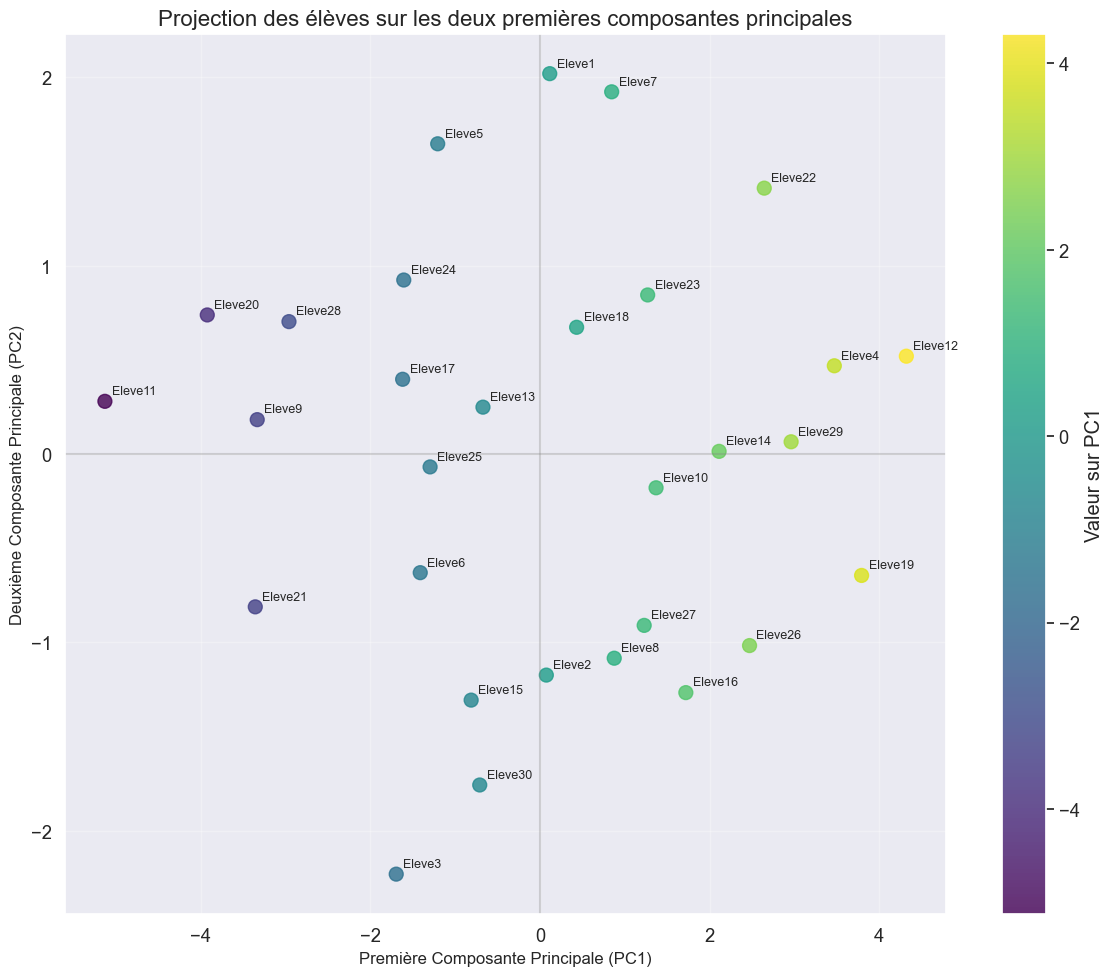

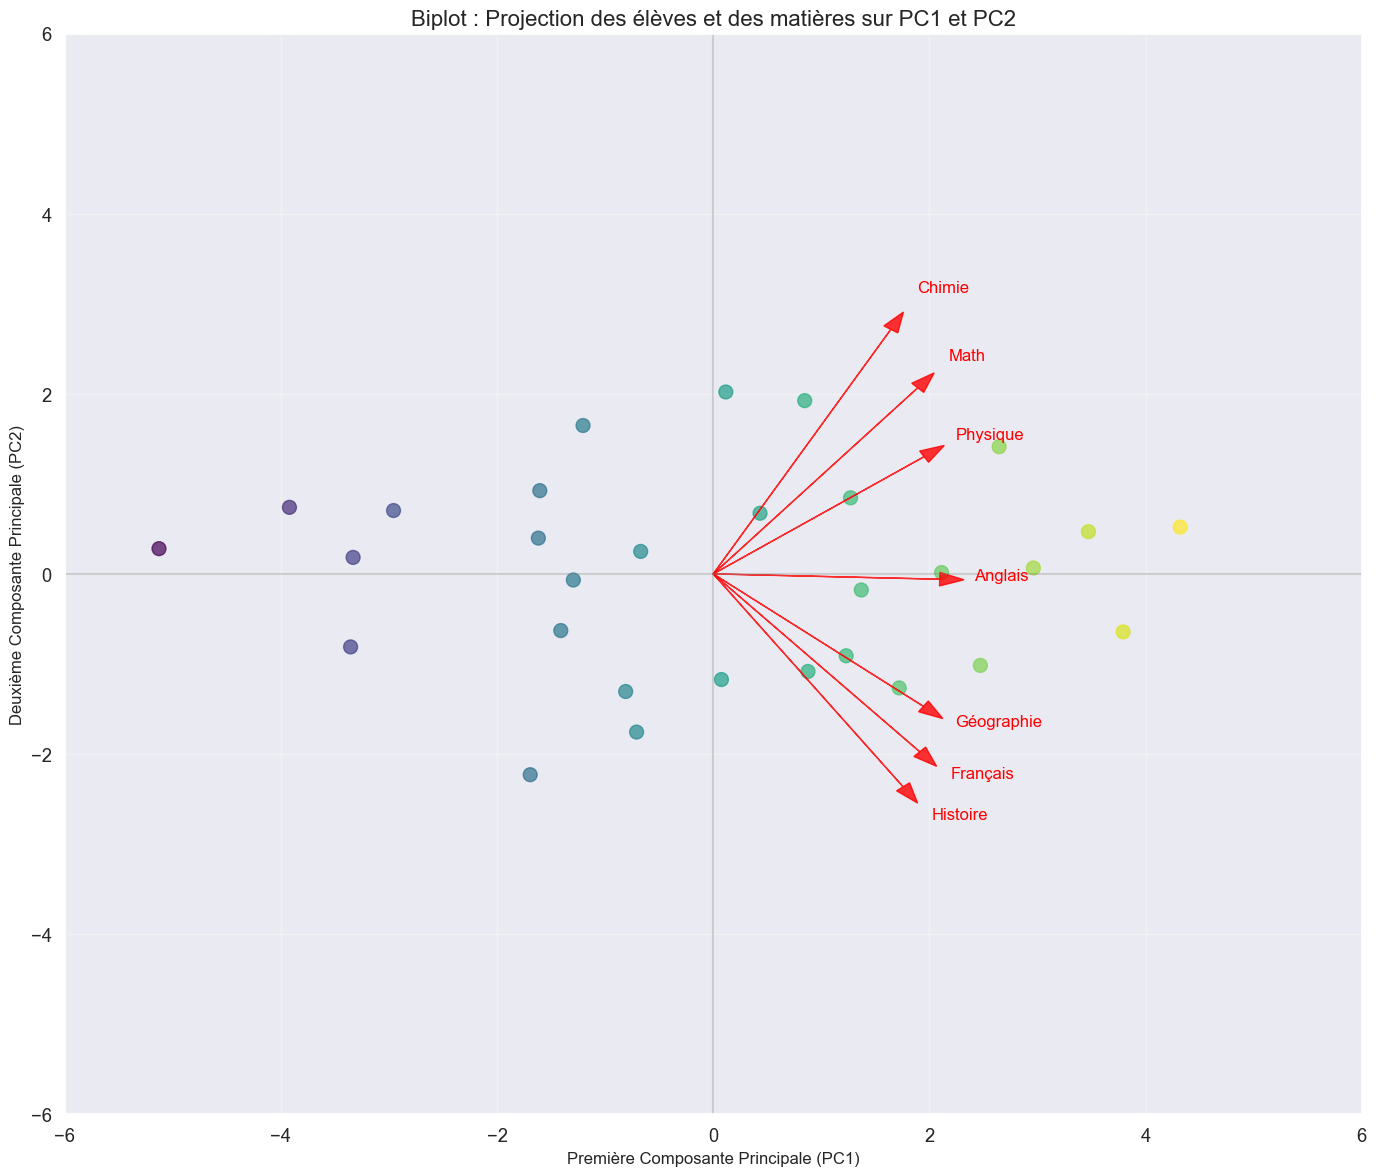

In [10]:
# Création d'un DataFrame avec les coordonnées des élèves sur les deux premières composantes
pca_df = pd.DataFrame({
    'PC1': components[:, 0],
    'PC2': components[:, 1],
    'Eleve': eleves
})

# Visualisation des élèves dans l'espace PC1-PC2
plt.figure(figsize=(12, 10))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=components[:, 0], cmap='viridis', s=100, alpha=0.8)
plt.colorbar(scatter, label='Valeur sur PC1')

# Annoter chaque point avec le numéro de l'élève
for i, txt in enumerate(pca_df['Eleve']):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=9, 
                 xytext=(5, 5), textcoords='offset points')

plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.title('Projection des élèves sur les deux premières composantes principales', fontsize=16)
plt.xlabel('Première Composante Principale (PC1)', fontsize=12)
plt.ylabel('Deuxième Composante Principale (PC2)', fontsize=12)
plt.tight_layout()
plt.show()

# Ajout d'une visualisation biplot (variables et individus)
# Normalisation des loadings pour l'affichage sur le graphique
n = loadings.shape[1]
scale = 5  # Facteur d'échelle pour les vecteurs de loadings
plt.figure(figsize=(14, 12))

# Affichage des individus
plt.scatter(components[:, 0], components[:, 1], c=components[:, 0], cmap='viridis', s=100, alpha=0.7)

# Affichage des variables
for i, (var, pc1_loading, pc2_loading) in enumerate(zip(X.columns, loadings[0, :], loadings[1, :])):
    plt.arrow(0, 0, pc1_loading*scale, pc2_loading*scale, color='red', alpha=0.8, head_width=0.15)
    plt.text(pc1_loading*scale*1.15, pc2_loading*scale*1.15, var, color='red', fontsize=12)

plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.title('Biplot : Projection des élèves et des matières sur PC1 et PC2', fontsize=16)
plt.xlabel('Première Composante Principale (PC1)', fontsize=12)
plt.ylabel('Deuxième Composante Principale (PC2)', fontsize=12)

# Équilibrer les axes pour une meilleure visualisation
plt.xlim(-6, 6)
plt.ylim(-6, 6)

plt.tight_layout()
plt.show()

In [11]:
# Interprétation textuelle des résultats
print("Interprétation des résultats de la PCA :")
print("\n1. Variance expliquée :")
print(f"   - Les deux premières composantes expliquent {cumulative_variance[1]:.2%} de la variance totale")
print(f"   - La première composante (PC1) explique {explained_variance[0]:.2%} de la variance")
print(f"   - La deuxième composante (PC2) explique {explained_variance[1]:.2%} de la variance")

print("\n2. Interprétation des composantes principales :")
print("   - PC1 semble représenter le niveau général de l'élève (toutes les matières y contribuent positivement)")
print("   - PC2 semble discriminer entre les aptitudes scientifiques et littéraires:")
print("     * Côté positif: on retrouve plutôt les matières scientifiques")
print("     * Côté négatif: on retrouve plutôt les matières littéraires")

print("\n3. Validation de l'hypothèse initiale :")
print("   L'analyse confirme bien l'existence de deux facteurs latents principaux :")
print("   - Un facteur scientifique (Math, Physique, Chimie)")
print("   - Un facteur littéraire (Français, Histoire, Géographie)")
print("   - L'Anglais se situe effectivement entre les deux domaines comme suggéré dans le contexte")

print("\n4. Profils d'élèves identifiables :")
print("   - Les élèves avec une forte valeur positive en PC1 ont de bonnes notes dans toutes les matières")
print("   - Les élèves avec une forte valeur positive en PC2 sont plus forts en sciences qu'en lettres")
print("   - Les élèves avec une forte valeur négative en PC2 sont plus forts en lettres qu'en sciences")

Interprétation des résultats de la PCA :

1. Variance expliquée :
   - Les deux premières composantes expliquent 96.36% de la variance totale
   - La première composante (PC1) explique 80.33% de la variance
   - La deuxième composante (PC2) explique 16.03% de la variance

2. Interprétation des composantes principales :
   - PC1 semble représenter le niveau général de l'élève (toutes les matières y contribuent positivement)
   - PC2 semble discriminer entre les aptitudes scientifiques et littéraires:
     * Côté positif: on retrouve plutôt les matières scientifiques
     * Côté négatif: on retrouve plutôt les matières littéraires

3. Validation de l'hypothèse initiale :
   L'analyse confirme bien l'existence de deux facteurs latents principaux :
   - Un facteur scientifique (Math, Physique, Chimie)
   - Un facteur littéraire (Français, Histoire, Géographie)
   - L'Anglais se situe effectivement entre les deux domaines comme suggéré dans le contexte

4. Profils d'élèves identifiables :
 

In [12]:
# Code pour générer un tableau récapitulatif des profils d'élèves
# Calcul des moyennes par groupe de matières
df['Moyenne_Scientifique'] = df[['Math', 'Physique', 'Chimie']].mean(axis=1)
df['Moyenne_Littéraire'] = df[['Français', 'Histoire', 'Géographie']].mean(axis=1)
df['Moyenne_Générale'] = df.drop(['Eleve', 'Moyenne_Scientifique', 'Moyenne_Littéraire'], axis=1, errors='ignore').mean(axis=1)

# Ajout des coordonnées PCA
df['PC1'] = components[:, 0]
df['PC2'] = components[:, 1]

# Identification des profils typiques
seuil = 1.5  # Seuil pour considérer une valeur comme significative
df['Profil'] = 'Équilibré'
df.loc[(df['PC1'] > seuil) & (abs(df['PC2']) < seuil), 'Profil'] = 'Excellent Général'
df.loc[(df['PC1'] < -seuil) & (abs(df['PC2']) < seuil), 'Profil'] = 'En Difficulté'
df.loc[(abs(df['PC1']) < seuil) & (df['PC2'] > seuil), 'Profil'] = 'Scientifique'
df.loc[(abs(df['PC1']) < seuil) & (df['PC2'] < -seuil), 'Profil'] = 'Littéraire'
df.loc[(df['PC1'] > seuil) & (df['PC2'] > seuil), 'Profil'] = 'Excellence Scientifique'
df.loc[(df['PC1'] > seuil) & (df['PC2'] < -seuil), 'Profil'] = 'Excellence Littéraire'

# Affichage du tableau récapitulatif
profil_df = df[['Eleve', 'Moyenne_Générale', 'Moyenne_Scientifique', 'Moyenne_Littéraire', 'PC1', 'PC2', 'Profil']]
print("Tableau récapitulatif des profils d'élèves :")
display(profil_df.sort_values('Profil'))

# Conclusion générale
print("\nConclusion :")
print("""
Cette analyse en composantes principales a permis de mettre en évidence la structure sous-jacente 
des notes des élèves et de confirmer l'hypothèse des deux facteurs latents (scientifique et littéraire). 
Avec seulement deux composantes principales, nous avons réussi à capturer une grande partie de la variance 
des données d'origine, ce qui démontre l'efficacité de la PCA pour la réduction de dimensions.

Les résultats permettent d'identifier différents profils d'élèves et pourraient être utilisés pour :
- Adapter les approches pédagogiques selon les profils identifiés
- Orienter les élèves vers des parcours qui correspondent à leurs points forts
- Identifier les élèves ayant besoin de soutien dans certains domaines

Cette analyse pourrait être enrichie par d'autres méthodes comme le clustering pour grouper 
automatiquement les élèves selon leurs profils de performance.
""")

Tableau récapitulatif des profils d'élèves :


,Eleve,Moyenne_Générale,Moyenne_Scientifique,Moyenne_Littéraire,PC1,PC2,Profil
27,Eleve28,10.000000,11.000000,9.000000,-2.958438,0.703742,En Difficulté
23,Eleve24,11.571429,13.000000,10.000000,-1.605002,0.924632,En Difficulté
20,Eleve21,9.571429,9.000000,10.000000,-3.355621,-0.810814,En Difficulté
19,Eleve20,8.857143,10.000000,7.666667,-3.921552,0.739147,En Difficulté
8,Eleve9,9.571429,10.000000,9.000000,-3.332553,0.183225,En Difficulté
10,Eleve11,7.428571,8.000000,6.666667,-5.128579,0.280478,En Difficulté
16,Eleve17,11.571429,12.000000,11.000000,-1.618258,0.397640,En Difficulté
25,Eleve26,16.428571,15.000000,17.666667,2.471814,-1.016380,Excellent Général
3,Eleve4,17.571429,18.000000,17.000000,3.471251,0.469248,Excellent Général
21,Eleve22,16.571429,18.000000,15.000000,2.645250,1.412432,Excellent Général



Conclusion :

Cette analyse en composantes principales a permis de mettre en évidence la structure sous-jacente 
des notes des élèves et de confirmer l'hypothèse des deux facteurs latents (scientifique et littéraire). 
Avec seulement deux composantes principales, nous avons réussi à capturer une grande partie de la variance 
des données d'origine, ce qui démontre l'efficacité de la PCA pour la réduction de dimensions.

Les résultats permettent d'identifier différents profils d'élèves et pourraient être utilisés pour :
- Adapter les approches pédagogiques selon les profils identifiés
- Orienter les élèves vers des parcours qui correspondent à leurs points forts
- Identifier les élèves ayant besoin de soutien dans certains domaines

Cette analyse pourrait être enrichie par d'autres méthodes comme le clustering pour grouper 
automatiquement les élèves selon leurs profils de performance.

